In [1]:
import pandas as pd
import numpy as np
from proccessvitext import *
import matplotlib.pyplot as plt

d:\DoAnTotNghiep\Document_Classification_With_Cuckoo_Search\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
input_path_file = './dataset/raw_news_dataset.csv'
output_path_file = './dataset/news_dataset.csv'
df = pd.read_csv(input_path_file)
df = df.iloc[:, 2:].copy()
print(df.shape)
df.head()

(184539, 10)


,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,218270,NaN,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...",3,0,docbao.vn,"Tên cướp tiệm vàng Huế đại uý công an, công tá...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308
1,218269,doãn hằng,"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G",Sức khỏe - Đời sống,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469
2,218268,NaN,"Kết thi nghiệp THPT 2022 trung bình môn toán, ...",3,0,thanhnien.vn,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...",Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901
3,218267,NaN,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,1,0,vnexpress,Người chết mưa lũ 'nghìn một' Mỹ 28,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498
4,218266,mi lan,Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",Thời sự,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170


In [3]:
required_cols = ['content', 'topic', 'source', 'title', 'url']
df[required_cols] = df[required_cols].apply(lambda s: s.str.strip())
df[required_cols] = df[required_cols].replace(
    to_replace=[r'^\s*$', r'(?i)^none$'],
    value=np.nan,
    regex=True
)
df = df.dropna(subset=required_cols).copy()
df.shape

(161066, 10)

In [4]:
df['topic'] = df['topic'].apply(preprocess_topic)
df.head()


,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,218270,NaN,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...",3,0,docbao.vn,"Tên cướp tiệm vàng Huế đại uý công an, công tá...",pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308
1,218269,doãn hằng,"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G",sức khỏe đời sống,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469
2,218268,NaN,"Kết thi nghiệp THPT 2022 trung bình môn toán, ...",3,0,thanhnien.vn,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...",giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901
3,218267,NaN,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,1,0,vnexpress,Người chết mưa lũ 'nghìn một' Mỹ 28,thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498
4,218266,mi lan,Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",thời sự,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170


In [5]:
topic_counts = df['topic'].value_counts()
print(topic_counts)
print(len(topic_counts))

topic
sức khỏe đời sống       23230
văn hóa giải trí        21186
thể thao                19227
thế giới                16679
xã hội                  15555
thời sự                 15190
pháp luật               10647
kinh doanh tài chính    10312
giáo dục                 7626
kinh tế                  5255
công nghệ                4248
chính trị                4028
xe                       3786
bạn đọc                  1715
bất động sản             1457
quốc phòng                925
Name: count, dtype: int64
16


In [9]:
df = df[~df['topic'].isin(['bạn đọc', 'bất động sản', 'quốc phòng'])].copy()
df.shape

(156969, 10)

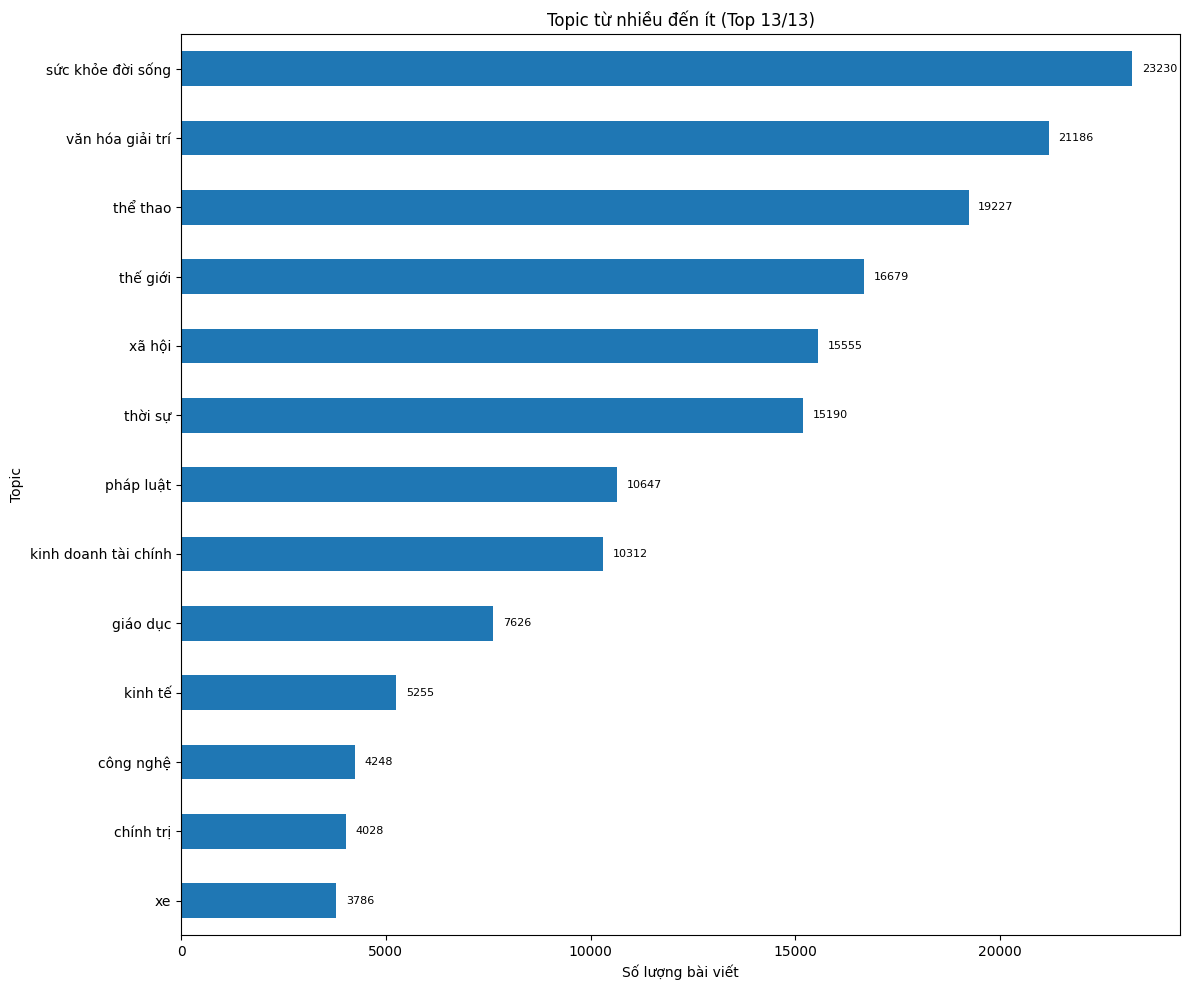

In [10]:
topic_counts = df['topic'].value_counts()

# Hiển thị tối đa 100 topic cho dễ nhìn (điều chỉnh nếu cần)
top_n = 100 if len(topic_counts) > 100 else len(topic_counts)
top_counts = topic_counts.head(top_n).sort_values(ascending=True)

plt.figure(figsize=(12, 10))
ax = top_counts.plot(kind='barh', color='#1f77b4')
ax.set_title(f'Topic từ nhiều đến ít (Top {top_n}/{len(topic_counts)})')
ax.set_xlabel('Số lượng bài viết')
ax.set_ylabel('Topic')

# Hiển thị nhãn số lượng ở cuối mỗi thanh
for i, v in enumerate(top_counts.values):
    ax.text(v + max(top_counts.values) * 0.01, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [11]:
# Cân bằng số lượng bản ghi giữa các topic bằng cách downsample về mức nhỏ nhất
target_per_topic = int(topic_counts.min())
print(f'Target per topic (min count): {target_per_topic}')

# Lấy ngẫu nhiên target_per_topic mẫu cho mỗi topic và xáo trộn lại
df = (
    df.groupby('topic', group_keys=False)
      .apply(lambda g: g.sample(n=target_per_topic, random_state=42))
      .sample(frac=1, random_state=42)
      .reset_index(drop=True)
)

# Kiểm tra lại phân phối sau khi cân bằng
print(df['topic'].value_counts())
print(df.shape)

Target per topic (min count): 3786
topic
kinh tế                 3786
pháp luật               3786
xe                      3786
giáo dục                3786
chính trị               3786
thế giới                3786
thể thao                3786
xã hội                  3786
công nghệ               3786
sức khỏe đời sống       3786
kinh doanh tài chính    3786
thời sự                 3786
văn hóa giải trí        3786
Name: count, dtype: int64
(49218, 10)


C:\Users\vuquo\AppData\Local\Temp\ipykernel_21460\248824675.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=target_per_topic, random_state=42))


In [12]:
df['content'] = df['content'].apply(remove_punctuation)
df['title'] = df['title'].apply(remove_punctuation)
df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,194289,ngọc phương linh,Hiện nay Cục Dự trữ Liên bang Mỹ FED tiếp tục ...,1,1,vtv.vn,Nguy suy thoái kinh tế Mỹ họp FED VTV VN,kinh tế,https://vtv.vn/kinh-te/nguy-co-suy-thoai-kinh-...,2022-07-27 09:48:49.335225
1,129311,thiên minh,Ngày 14 7 Công an TX Ba Đồn biết Cơ quan Cảnh ...,1,1,tienphong,Khởi tố đối tượng lừa đảo chạy việc bao đậu cô...,pháp luật,https://tienphong.vn/khoi-to-doi-tuong-lua-dao...,2022-07-14 18:16:22.416107
2,56438,xuân mai,Subaru Forester dần trở phổ biến phân khúc cro...,3,1,thanhnien.vn,Subaru Forester 2022 phiên thể thao STI Sport,xe,https://thanhnien.vn/subaru-forester-2022-co-t...,2022-06-29 15:21:59.301578
3,123115,NaN,Có tình huống đời hầu ta chứng kiến cảnh đứa t...,2,1,kenh14,3 kiểu thông minh giả trẻ tác dụng ngược Cha m...,giáo dục,https://kenh14.vn/3-kieu-thong-minh-gia-cua-tr...,2022-07-13 17:10:40.033391
4,73255,NaN,Tham dự lớp tập huấn 70 cán CĐCS trực Công đoà...,2,1,laodong,Cần Thơ Hơn 70 cán CĐCS tập huấn công tác thi ...,chính trị,https://laodong.vn/ldld-can-tho/can-tho-hon-70...,2022-07-01 20:55:06.349263


In [13]:
df['content'] = df['content'].apply(to_lower)
df['title'] = df['title'].apply(to_lower)
df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,194289,ngọc phương linh,hiện nay cục dự trữ liên bang mỹ fed tiếp tục ...,1,1,vtv.vn,nguy suy thoái kinh tế mỹ họp fed vtv vn,kinh tế,https://vtv.vn/kinh-te/nguy-co-suy-thoai-kinh-...,2022-07-27 09:48:49.335225
1,129311,thiên minh,ngày 14 7 công an tx ba đồn biết cơ quan cảnh ...,1,1,tienphong,khởi tố đối tượng lừa đảo chạy việc bao đậu cô...,pháp luật,https://tienphong.vn/khoi-to-doi-tuong-lua-dao...,2022-07-14 18:16:22.416107
2,56438,xuân mai,subaru forester dần trở phổ biến phân khúc cro...,3,1,thanhnien.vn,subaru forester 2022 phiên thể thao sti sport,xe,https://thanhnien.vn/subaru-forester-2022-co-t...,2022-06-29 15:21:59.301578
3,123115,NaN,có tình huống đời hầu ta chứng kiến cảnh đứa t...,2,1,kenh14,3 kiểu thông minh giả trẻ tác dụng ngược cha m...,giáo dục,https://kenh14.vn/3-kieu-thong-minh-gia-cua-tr...,2022-07-13 17:10:40.033391
4,73255,NaN,tham dự lớp tập huấn 70 cán cđcs trực công đoà...,2,1,laodong,cần thơ hơn 70 cán cđcs tập huấn công tác thi ...,chính trị,https://laodong.vn/ldld-can-tho/can-tho-hon-70...,2022-07-01 20:55:06.349263


In [14]:
df['content'] = df['content'].apply(standardize_unicode)
df['title'] = df['title'].apply(standardize_unicode)
df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,194289,ngọc phương linh,hiện nay cục dự trữ liên bang mỹ fed tiếp tục ...,1,1,vtv.vn,nguy suy thoái kinh tế mỹ họp fed vtv vn,kinh tế,https://vtv.vn/kinh-te/nguy-co-suy-thoai-kinh-...,2022-07-27 09:48:49.335225
1,129311,thiên minh,ngày 14 7 công an tx ba đồn biết cơ quan cảnh ...,1,1,tienphong,khởi tố đối tượng lừa đảo chạy việc bao đậu cô...,pháp luật,https://tienphong.vn/khoi-to-doi-tuong-lua-dao...,2022-07-14 18:16:22.416107
2,56438,xuân mai,subaru forester dần trở phổ biến phân khúc cro...,3,1,thanhnien.vn,subaru forester 2022 phiên thể thao sti sport,xe,https://thanhnien.vn/subaru-forester-2022-co-t...,2022-06-29 15:21:59.301578
3,123115,NaN,có tình huống đời hầu ta chứng kiến cảnh đứa t...,2,1,kenh14,3 kiểu thông minh giả trẻ tác dụng ngược cha m...,giáo dục,https://kenh14.vn/3-kieu-thong-minh-gia-cua-tr...,2022-07-13 17:10:40.033391
4,73255,NaN,tham dự lớp tập huấn 70 cán cđcs trực công đoà...,2,1,laodong,cần thơ hơn 70 cán cđcs tập huấn công tác thi ...,chính trị,https://laodong.vn/ldld-can-tho/can-tho-hon-70...,2022-07-01 20:55:06.349263


In [15]:
df['content'] = df['content'].apply(normalize_text)
df['title'] = df['title'].apply(normalize_text)
df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,194289,ngọc phương linh,hiện nay cục dự trữ liên bang mỹ fed tiếp tục ...,1,1,vtv.vn,nguy suy thoái kinh tế mỹ họp fed vtv vn,kinh tế,https://vtv.vn/kinh-te/nguy-co-suy-thoai-kinh-...,2022-07-27 09:48:49.335225
1,129311,thiên minh,ngày 14 7 công an tx ba đồn biết cơ quan cảnh ...,1,1,tienphong,khởi tố đối tượng lừa đảo chạy việc bao đậu cô...,pháp luật,https://tienphong.vn/khoi-to-doi-tuong-lua-dao...,2022-07-14 18:16:22.416107
2,56438,xuân mai,subaru forester dần trở phổ biến phân khúc cro...,3,1,thanhnien.vn,subaru forester 2022 phiên thể thao sti sport,xe,https://thanhnien.vn/subaru-forester-2022-co-t...,2022-06-29 15:21:59.301578
3,123115,NaN,có tình huống đời hầu ta chứng kiến cảnh đứa t...,2,1,kenh14,3 kiểu thông minh giả trẻ tác dụng ngược cha m...,giáo dục,https://kenh14.vn/3-kieu-thong-minh-gia-cua-tr...,2022-07-13 17:10:40.033391
4,73255,NaN,tham dự lớp tập huấn 70 cán cđcs trực công đoà...,2,1,laodong,cần thơ hơn 70 cán cđcs tập huấn công tác thi ...,chính trị,https://laodong.vn/ldld-can-tho/can-tho-hon-70...,2022-07-01 20:55:06.349263


In [16]:
df['title'] = df['title'].apply(split_words)
df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,194289,ngọc phương linh,hiện nay cục dự trữ liên bang mỹ fed tiếp tục ...,1,1,vtv.vn,nguy suy_thoái kinh_tế mỹ họp fed vtv vn,kinh tế,https://vtv.vn/kinh-te/nguy-co-suy-thoai-kinh-...,2022-07-27 09:48:49.335225
1,129311,thiên minh,ngày 14 7 công an tx ba đồn biết cơ quan cảnh ...,1,1,tienphong,khởi_tố đối_tượng lừa_đảo chạy việc bao đậu cô...,pháp luật,https://tienphong.vn/khoi-to-doi-tuong-lua-dao...,2022-07-14 18:16:22.416107
2,56438,xuân mai,subaru forester dần trở phổ biến phân khúc cro...,3,1,thanhnien.vn,subaru forester 2022 phiên thể_thao sti sport,xe,https://thanhnien.vn/subaru-forester-2022-co-t...,2022-06-29 15:21:59.301578
3,123115,NaN,có tình huống đời hầu ta chứng kiến cảnh đứa t...,2,1,kenh14,3 kiểu thông_minh giả trẻ tác_dụng ngược cha_m...,giáo dục,https://kenh14.vn/3-kieu-thong-minh-gia-cua-tr...,2022-07-13 17:10:40.033391
4,73255,NaN,tham dự lớp tập huấn 70 cán cđcs trực công đoà...,2,1,laodong,cần thơ hơn 70 cán cđcs tập_huấn công_tác thi_...,chính trị,https://laodong.vn/ldld-can-tho/can-tho-hon-70...,2022-07-01 20:55:06.349263


In [17]:
df['content'] = df['content'].apply(split_words)
df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,194289,ngọc phương linh,hiện_nay cục dự_trữ liên_bang mỹ_fed tiếp_tục ...,1,1,vtv.vn,nguy suy_thoái kinh_tế mỹ họp fed vtv vn,kinh tế,https://vtv.vn/kinh-te/nguy-co-suy-thoai-kinh-...,2022-07-27 09:48:49.335225
1,129311,thiên minh,ngày 14 7 công_an tx ba đồn biết cơ_quan cảnh_...,1,1,tienphong,khởi_tố đối_tượng lừa_đảo chạy việc bao đậu cô...,pháp luật,https://tienphong.vn/khoi-to-doi-tuong-lua-dao...,2022-07-14 18:16:22.416107
2,56438,xuân mai,subaru forester dần trở phổ_biến phân_khúc cro...,3,1,thanhnien.vn,subaru forester 2022 phiên thể_thao sti sport,xe,https://thanhnien.vn/subaru-forester-2022-co-t...,2022-06-29 15:21:59.301578
3,123115,NaN,có tình_huống đời hầu_ta chứng_kiến cảnh đứa t...,2,1,kenh14,3 kiểu thông_minh giả trẻ tác_dụng ngược cha_m...,giáo dục,https://kenh14.vn/3-kieu-thong-minh-gia-cua-tr...,2022-07-13 17:10:40.033391
4,73255,NaN,tham_dự lớp tập_huấn 70 cán cđcs trực công_đoà...,2,1,laodong,cần thơ hơn 70 cán cđcs tập_huấn công_tác thi_...,chính trị,https://laodong.vn/ldld-can-tho/can-tho-hon-70...,2022-07-01 20:55:06.349263


In [ ]:
# load Vietnamese stopwords and apply stopword removal to content and title
# with open('vietnamese-stopwords.txt', 'r', encoding='utf-8-sig') as f:
#     stopwords = {line.strip() for line in f}
# print(stopwords)
# print(len(stopwords))
# df['content'] = df['content'].apply(stopword_removal, stopwords=stopwords)
# df['title'] = df['title'].apply(stopword_removal, stopwords=stopwords)
# df.head()

{'bây chừ', 'chốc chốc', 'thảo nào', 'nhân dịp', 'dễ thường', 'chính thị', 'vả chăng', 'chùn chũn', 'ngày ngày', 'ra sao', 'oái', 'tà tà', 'ắt là', 'chứ', 'tọt', 'bất thình lình', 'bấy giờ', 'ngọn', 'trước đây', 'trước đó', 'thốt nhiên', 'xiết bao', 'chẳng nữa', 'chết thật', 'tốc tả', 'tuốt luốt', 'nghe đâu', 'bay biến', 'nhiều', 'cha chả', 'nhất sinh', 'thoạt', 'chính', 'quá sá', 'do', 'nhưng mà', 'tất cả', 'so', 'sao', 'suýt', 'bội phần', 'hầu hết', 'bấy lâu', 'ơ', 'ra phết', 'ngộ nhỡ', 'nền', 'trỏng', 'bởi chưng', 'cật sức', 'ai', 'phỉ phui', 'cùng', 'chung quy', 'nhất định', 'thôi', 'cho tới', 'ngoải', 'trếu tráo', 'bản', 'hay', 'trước kia', 'văng tê', 'tù tì', 'nhất luật', 'ứ hự', 'chuyện', 'riêng', 'quả là', 'tựu trung', 'của', 'cổ lai', 'này', 'toà', 'nh', 'chợt', 'lớn', 'cuộc', 'dù rằng', 'dưới', 'bất đồ', 'cô mình', 'công nhiên', 'xăm xăm', 'muốn', 'sất', 'nhân tiện', 'ử', 'vì thế', 'dì', 'vung thiên địa', 'thế nên', 'bấy chầy', 'bạn', 'amen', 'em', 'trời đất ơi', 'lúc', 'tôi'

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,15594,khánh linh,tài_kiến góp dân dự_thảo thông_tư sửa_đổi bổ_s...,1,1,tienphong,điều_chỉnh giá kiểm_định xe_giới trung_tâm đăn...,kinh tế,https://tienphong.vn/dieu-chinh-gia-kiem-dinh-...,2022-06-18 08:58:34.610567
1,129311,thiên minh,14 7 công_an tx ba đồn cơ_quan cảnh_sát tra cô...,1,1,tienphong,khởi_tố đối_tượng lừa_đảo chạy bao đậu công_ch...,pháp luật,https://tienphong.vn/khoi-to-doi-tuong-lua-dao...,2022-07-14 18:16:22.416107
2,56438,xuân mai,subaru forester dần trở phổ_biến phân_khúc cro...,3,1,thanhnien.vn,subaru forester 2022 phiên thể_thao sti sport,xe,https://thanhnien.vn/subaru-forester-2022-co-t...,2022-06-29 15:21:59.301578
3,123115,NaN,tình_huống đời hầu_ta chứng_kiến cảnh đứa trẻ ...,2,1,kenh14,3 kiểu thông_minh giả trẻ tác_dụng ngược cha_m...,giáo dục,https://kenh14.vn/3-kieu-thong-minh-gia-cua-tr...,2022-07-13 17:10:40.033391
4,73255,NaN,tham_dự lớp tập_huấn 70 cán cđcs trực công_đoà...,2,1,laodong,thơ 70 cán cđcs tập_huấn công_tác thi_đua khen...,chính trị,https://laodong.vn/ldld-can-tho/can-tho-hon-70...,2022-07-01 20:55:06.349263


In [19]:
df.to_csv(output_path_file, index=False)
